# 3. Video - acquisition and simple processing

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


def display_image(image):
    plt.figure()
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

**a**) Display a video acquired from the webcam (in color) in one window and acquire 
and save a frame when the user presses the keyboard. Show the acquired frame in another
window.

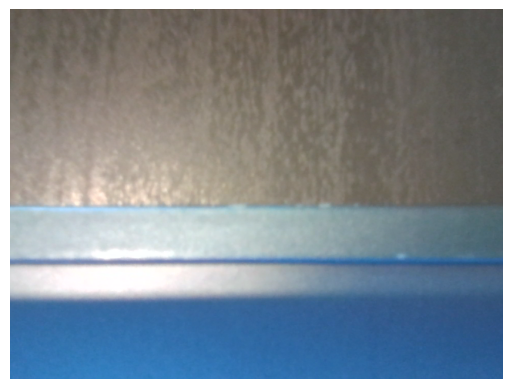

In [3]:
capture = cv2.VideoCapture(0)

while True:
    ret, frame = capture.read()

    cv2.imshow("frame", frame)

    if cv2.waitKey(1) == ord("c"):
        cv2.imwrite("out/capture.jpg", frame)
        cv2.destroyWindow("frame")
        break

capture.release()
display_image(frame)

**b)** Display the video acquired from the webcam (in color) in one window and the result
of the conversion of each frame to grayscale in another window

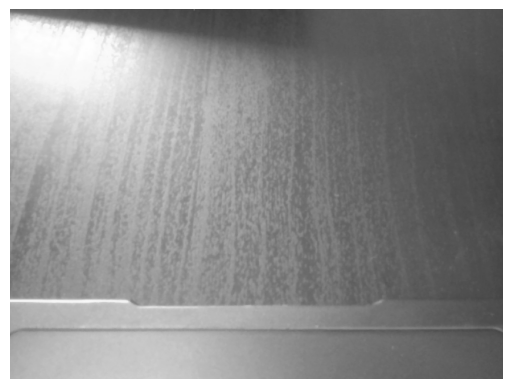

In [4]:
capture = cv2.VideoCapture(0)

while True:
    ret, frame = capture.read()

    grayscale = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow("frame", frame)
    cv2.imshow("gray", grayscale)

    if cv2.waitKey(1) == ord("q"):
        break

capture.release()
cv2.destroyAllWindows()
display_image(grayscale)

**c)** Modify the program developed in **b)** so that the resulting frames are in binary
format (intensity of each pixel is $0$ or $255$); use a threshold value of $128$.

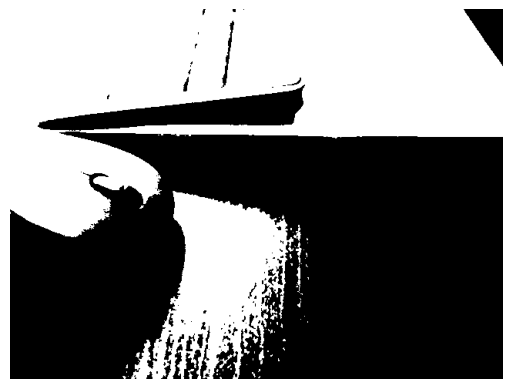

In [5]:
THRESHOLD = 128

capture = cv2.VideoCapture(0)

while True:
    ret, frame = capture.read()

    grayscale = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    binary = cv2.threshold(grayscale, THRESHOLD, 255, cv2.THRESH_BINARY)[1]

    cv2.imshow("frame", frame)
    cv2.imshow("binary", binary)

    if cv2.waitKey(1) == ord("q"):
        break

capture.release()
cv2.destroyAllWindows()
display_image(binary)

d) Implement a simple tracking algorithm for colored objects, using the following steps:
    
    1. Take each frame of the video;
    2. Convert from BGR to HSV color-space;
    3. Threshold the HSV image for a range of color values (creating a binary image);
    4. Extract the objects of the selected range (use a bitwise AND operation, using as operands the original and the binary image).

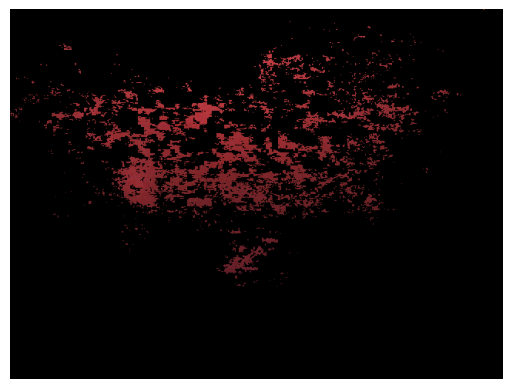

In [11]:
capture = cv2.VideoCapture(0)

while True:
    ret, frame = capture.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    mask_1 = cv2.inRange(hsv, (170, 170, 20), (180, 255, 255))
    mask_2 = cv2.inRange(hsv, (0, 200, 20), (10, 255, 255))

    mask = mask_1 | mask_2
    result = cv2.bitwise_and(hsv, hsv, mask=mask)
    masked = cv2.cvtColor(result, cv2.COLOR_HSV2BGR)

    cv2.imshow("result", masked)

    if cv2.waitKey(1) == ord("q"):
        break

capture.release()
cv2.destroyAllWindows()

display_image(masked)